[*********************100%***********************]  1 of 1 completed


<Figure size 1700x1000 with 0 Axes>

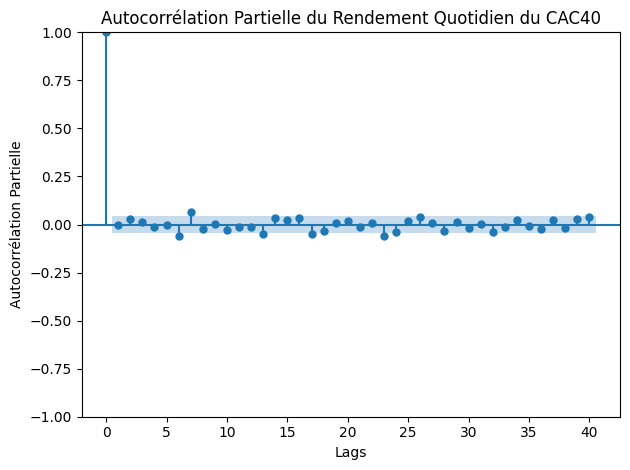

In [44]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

# Récupérer les données historiques du CAC 40 à l'aide de yfinance
cac40_data = yf.download('^FCHI', start='2015-01-01', end='2023-08-01')

# Calculer les rendements quotidiens (retour sur investissement) du CAC 40
cac40_data['Daily_Return'] = cac40_data['Close'].pct_change()

# Supprimer la première ligne qui contient NaN en raison du calcul des rendements
cac40_data = cac40_data.dropna()

# Calculer l'autocorrélation partielle des rendements quotidiens
plt.figure(figsize=(17, 10))
plot_pacf(cac40_data['Daily_Return'], lags=40, alpha=0.05, method='ywmle')

plt.title('Autocorrélation Partielle du Rendement Quotidien du CAC40')
plt.xlabel('Lags')
plt.ylabel('Autocorrélation Partielle')

plt.tight_layout()
plt.show()


In [48]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Récupérer les données historiques du CAC 40 à l'aide de yfinance
cac40_data = yf.download('^FCHI', start='2015-01-01', end='2023-08-01', progress=False)

# Fonction pour calculer le coefficient de Hurst
def get_hurst_exponent(time_series, max_lag=500):
    """Returns the Hurst Exponent of the time series"""

    lags = range(2, max_lag)

    # variances
    tau = [np.std(np.subtract(time_series[lag:], time_series[:-lag])) for lag in lags]

    # the Hurst Exponent
    reg = np.polyfit(np.log(lags), np.log(tau), 1)

    return reg[0]

# Calculer et afficher le coefficient de Hurst pour différents lags
for lag in [10,40,100,500] :
    hurst_exp = get_hurst_exponent(cac40_data["Adj Close"].values, lag)
    print(f"Coefficient de Hurst {lag} pas de temps: {hurst_exp:.4f}")


Coefficient de Hurst 10 pas de temps: 0.5105
Coefficient de Hurst 40 pas de temps: 0.4772
Coefficient de Hurst 100 pas de temps: 0.4379
Coefficient de Hurst 500 pas de temps: 0.2977
